# <font color=blue>Data Science Project</font>

### Objective - develop a repeatable model in GCP on stock price predictive model 

### Key Results <br>
1. Build a simple data model in Python with market data and visuals
2. Loaded and run a Jupyter notebook in GCP environment
3. Create a document that teaches others the process

# Learning resources links
Formatting Jupyter notebooks
[Note book formatting](https://medium.com/analytics-vidhya/the-jupyter-notebook-formatting-guide-873ab39f765e)<br>
Algorithmic trading [DataCamp Example](https://www.datacamp.com/community/tutorials/finance-python-trading)

## Issues to fix
1. Datetools on pandas - although code still runs
2. regression runs onan older package - could be done in scikit learn
3. can add %matplotlibline to save typing plt.show each time

In [32]:
# Libraries and dependencies
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
import datetime




# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Import `numpy` as `np`
import numpy as np

# for linear regression modelling
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
#from pandas.core import datetools

In [4]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.258014
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.161551
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.322326
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.254304
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.178867


In [5]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,49.880241
2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.275993
2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,49.794914
2011-12-29,57.950001,57.215714,57.628571,57.874287,53994500,50.101627
2011-12-30,58.040001,57.641430,57.644287,57.857143,44915500,50.086784


In [6]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,29.237566,28.507684,28.901012,28.889151,1.882896e+08,25.009263
std,14.199012,14.029758,14.123131,14.119734,1.027007e+08,12.223417
min,10.568571,10.371428,10.488571,10.461429,3.937360e+07,9.056430
25%,17.752857,17.182143,17.457857,17.431429,1.122037e+08,15.090342
50%,25.642857,24.725714,25.260000,25.120001,1.629866e+08,21.746317
75%,39.132858,38.351429,38.777143,38.699999,2.316230e+08,33.502491
max,60.957142,59.427143,60.251427,60.320000,8.432424e+08,52.218872


In [10]:
# export to csv thanks to pandas and open the file afterwards
# aapl.to_csv('data/aapl_ohlc.csv')
# df = pd.read_csv('data/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)
aapl.to_csv('C:/Users/andre/Documents/Andrew/4. Education/Python/aapl_ohlc.csv')
df = pd.read_csv('C:/Users/andre/Documents/Andrew/4. Education/Python/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.258014
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.161551
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.322326
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.254304
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.178867


In [13]:
# Inpect the index 
print(aapl.index)

# Inspect the columns
print(aapl.columns)

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]
print(ts)
# Check the type of `ts` 
type(ts)

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
Date
2011-12-16    54.431427
2011-12-19    54.601429
2011-12-20    56.564285
2011-12-21    56.635715
2011-12-22    56.935715
2011-12-23    57.618572
2011-12-27    58.075714
2011-12-28    57.520000
2011-12-29    57.874287
2011-12-30    57.857143
Name: Close, dtype: float64


pandas.core.series.Series

In [14]:
# iloc for referencing the dataframe
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   9.789802
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   9.767539
2006-11-03  11.361428  11.112857  11.337143  11.184286  107972200   9.682207
2006-11-06  11.437143  11.204286  11.278571  11.387143  108644200   9.857821
2006-11-07  11.571428  11.447143  11.492857  11.501429  131483100   9.956757
                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900  10.363638
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100  10.593664
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400  10.518225
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700  10.570165

In [15]:
# sampling and monthly level data
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M').mean()

# Print `monthly_aapl`
print(monthly_aapl)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2011-12-14  55.340000  53.954285  55.242859  54.312859  101721900  47.018505
2010-03-24  32.885715  32.501427  32.520000  32.767143  149445100  28.366425
2011-06-30  48.018570  47.548573  47.814285  47.952858   80738700  41.512661
2011-10-24  58.071430  56.485714  56.597141  57.967144  125534500  50.182007
2006-12-04  13.150000  12.928572  13.125714  13.017143  177384200  11.268908
2008-10-13  15.790000  14.431429  14.935715  15.751429  384769000  13.635969
2009-06-10  20.335714  19.757143  20.325714  20.035715  172155900  17.344868
2008-12-11  14.462857  13.547143  13.907143  13.571428  260154300  11.748752
2007-12-27  28.994286  28.257143  28.421429  28.367144  198881900  24.557364
2007-11-16  23.860001  22.761429  23.614286  23.770000  345873500  20.577629
2007-12-26  28.708570  28.117144  28.430000  28.421429  175933100  24.604359

In [16]:
# create a new column of differences in opne / close then delete it
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

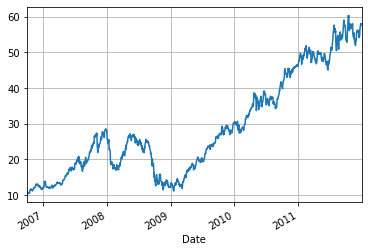

In [19]:
# visualise the data
# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

In [21]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010988
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003230
2006-10-19   0.059842
2006-10-20   0.012154
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010795
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007763
2011-11-30   0.024115
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008493
2011-12-06

In [22]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


In [23]:
# Daily returns - using shift method as it is more transparent
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010988
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003230
2006-10-19   0.059842
2006-10-20   0.012154
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010795
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007763
2011-11-30   0.024115
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008493
2011-12-06

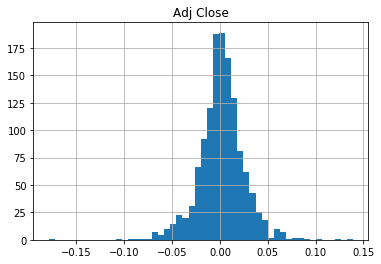

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179196
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [24]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [25]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006947
2006-10-05   0.999599
2006-10-06   0.991451
2006-10-09   0.996928
2006-10-10   0.985974
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137
2006-10-16   1.007214
2006-10-17   0.992386
2006-10-18   0.995592
2006-10-19   1.055170
2006-10-20   1.067994
2006-10-23   1.088165
2006-10-24   1.082688
2006-10-25   1.091103
2006-10-26   1.097917
2006-10-27   1.074139
2006-10-30   1.074272
2006-10-31   1.083089
2006-11-01   1.057441
2006-11-02   1.055036
2006-11-03   1.045819
2006-11-06   1.064788
2006-11-07   1.075474
2006-11-08   1.101389
2006-11-09   1.113278
2006-11-10   1.110339
...               ...
2011-11-17   5.041546
2011-11-18   5.008550
2011-11-21   4.929336
2011-11-22   5.029523
2011-11-23   4.902351
2011-11-25   4.856666
2011-11-28   5.024313
2011-11-29   4.985307
2011-11-30   5.105530
2011-12-01   5.182074
2011-12-02   5.205719
2011-12-05   5.249934
2011-12-06

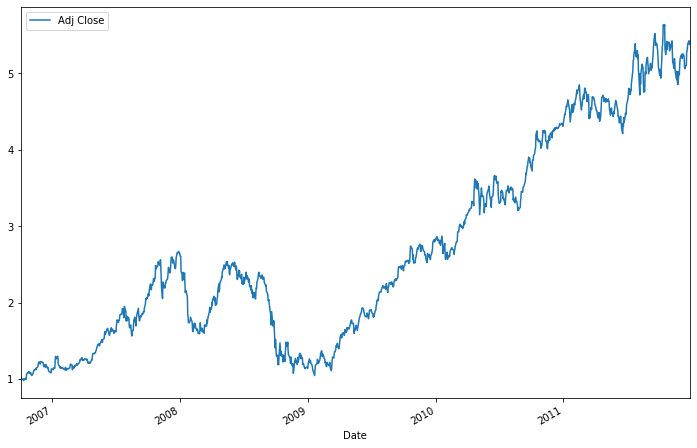

In [26]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [27]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
2007-03-31   1.210302
2007-04-30   1.251737
2007-05-31   1.453453
2007-06-30   1.625638
2007-07-31   1.818073
2007-08-31   1.734484
2007-09-30   1.897943
2007-10-31   2.295090
2007-11-30   2.333130
2007-12-31   2.544818
2008-01-31   2.142374
2008-02-29   1.671828
2008-03-31   1.747569
2008-04-30   2.113108
2008-05-31   2.468068
2008-06-30   2.384261
2008-07-31   2.240832
2008-08-31   2.285193
2008-09-30   1.886767
2008-10-31   1.322521
2008-11-30   1.254883
2008-12-31   1.222865
2009-01-31   1.185881
2009-02-28   1.256669
2009-03-31   1.302498
...               ...
2009-07-31   1.994633
2009-08-31   2.221220
2009-09-30   2.374923
2009-10-31   2.575894
2009-11-30   2.675929
2009-12-31   2.657689
2010-01-31   2.774717
2010-02-28   2.655568
2010-03-31   2.984383
2010-04-30   3.354911
2010-05-31   3.359091
2010-06-30   3.488452
2010-07-31

In [33]:
# create function to get multiple stocks, combine them with their titlres
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

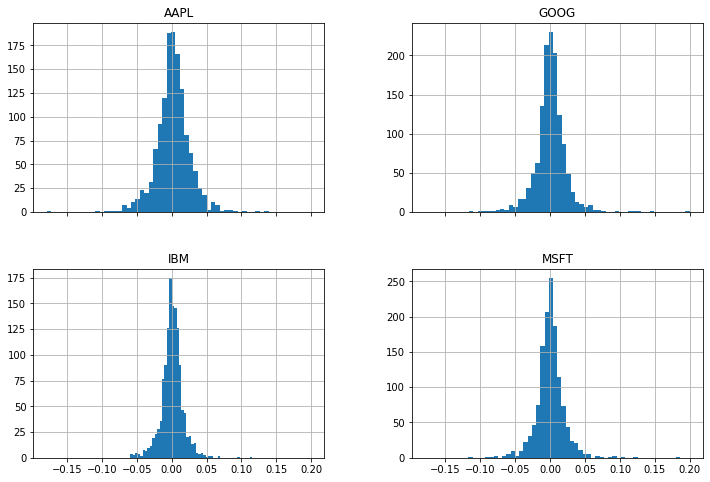

In [34]:
# create returns

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [35]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [36]:
# moving window stats

# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Date
2011-12-16    48.071899
2011-12-19    48.038941
2011-12-20    48.008580
2011-12-21    48.004499
2011-12-22    47.998161
2011-12-23    47.993956
2011-12-27    47.998840
2011-12-28    47.992224
2011-12-29    48.018844
2011-12-30    48.042311
Name: Adj Close, dtype: float64


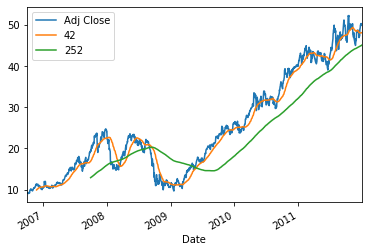

In [37]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

# Show plot
plt.show()

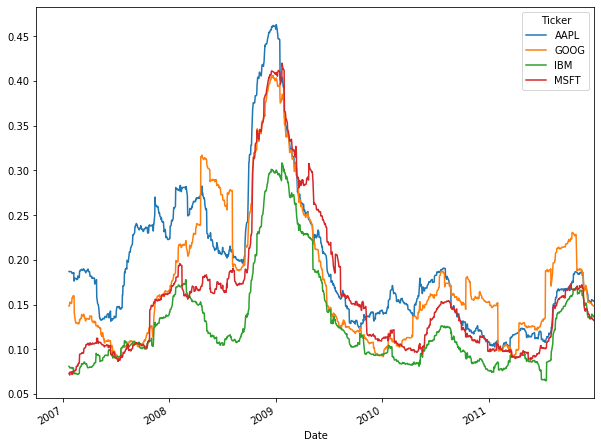

In [38]:
# calculate volatility
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()


In [39]:
# build regression model
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

C:\Users\andre\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.33e-96
Time:                        17:19:09   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

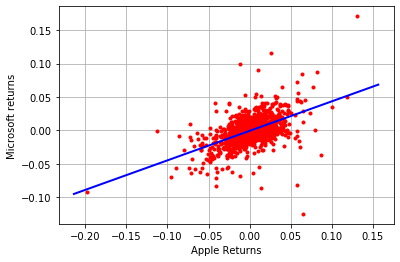

In [40]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

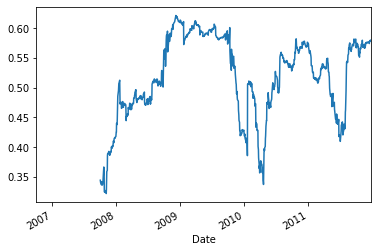

In [41]:
# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()